#importing libraries

In [25]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn import metrics

Data collecting and Processing

In [26]:
#loading the csv data to a Pandas DataFrame

In [27]:
data=pd.read_csv(r"C:\Users\User\Downloads\gld_price_data.csv")

In [28]:
# print first 5 rows in the dataFrame
data.head(5)

,Date,SPX,GLD,USO,SLV,EUR/USD
0,1/2/2008,1447.160034,84.860001,78.470001,15.180,1.471692
1,1/3/2008,1447.160034,85.570000,78.370003,15.285,1.474491
2,1/4/2008,1411.630005,85.129997,77.309998,15.167,1.475492
3,1/7/2008,1416.180054,84.769997,75.500000,15.053,1.468299
4,1/8/2008,1390.189941,86.779999,76.059998,15.590,1.557099


In [29]:
# print last 5 rows of the dataFrame
data.tail(5)

,Date,SPX,GLD,USO,SLV,EUR/USD
2285,5/8/2018,2671.919922,124.589996,14.0600,15.5100,1.186789
2286,5/9/2018,2697.790039,124.330002,14.3700,15.5300,1.184722
2287,5/10/2018,2723.070068,125.180000,14.4100,15.7400,1.191753
2288,5/14/2018,2730.129883,124.489998,14.3800,15.5600,1.193118
2289,5/16/2018,2725.780029,122.543800,14.4058,15.4542,1.182033


In [30]:
# number of rows and columns
data.shape

(2290, 6)

In [31]:
# getting some basic information about the data
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2290 entries, 0 to 2289
Data columns (total 6 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Date     2290 non-null   object 
 1   SPX      2290 non-null   float64
 2   GLD      2290 non-null   float64
 3   USO      2290 non-null   float64
 4   SLV      2290 non-null   float64
 5   EUR/USD  2290 non-null   float64
dtypes: float64(5), object(1)
memory usage: 107.5+ KB


In [32]:
# checking the number of missing values
data.isnull().sum()

Date       0
SPX        0
GLD        0
USO        0
SLV        0
EUR/USD    0
dtype: int64

In [33]:
# getting the statistical measures of the data
data.describe()

,SPX,GLD,USO,SLV,EUR/USD
count,2290.000000,2290.000000,2290.000000,2290.000000,2290.000000
mean,1654.315776,122.732875,31.842221,20.084997,1.283653
std,519.111540,23.283346,19.523517,7.092566,0.131547
min,676.530029,70.000000,7.960000,8.850000,1.039047
25%,1239.874969,109.725000,14.380000,15.570000,1.171313
50%,1551.434998,120.580002,33.869999,17.268500,1.303297
75%,2073.010070,132.840004,37.827501,22.882500,1.369971
max,2872.870117,184.589996,117.480003,47.259998,1.598798


Correlation:
  1. Positive Correlation
  2. Negative Correlation

In [34]:
Correlation = df.corr()

In [35]:
#  is used to select only columns with numeric data types.
df=data.select_dtypes(include=[np.number])

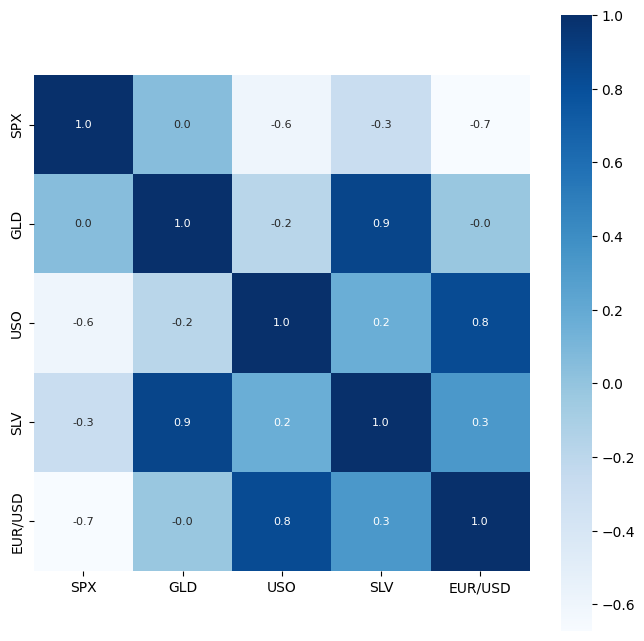

In [36]:
# constructing a heatmap to understand the correlation
plt.figure(figsize=(8, 8))
sns.heatmap(Correlation, cbar=True, square=True, fmt='.1f', annot=True, annot_kws={'size':8}, cmap='Blues')
plt.show()  # Don't forget to show the plot

In [37]:
# Correlation values of GLD
print(Correlation['GLD'])

SPX        0.049345
GLD        1.000000
USO       -0.186360
SLV        0.866632
EUR/USD   -0.024375
Name: GLD, dtype: float64


C:\Users\User\AppData\Local\Temp\ipykernel_3560\3849342733.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data['GLD'],color='green')


<Axes: xlabel='GLD', ylabel='Density'>

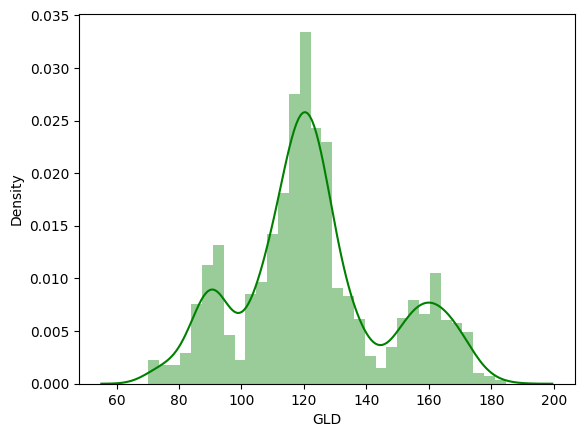

In [38]:
# checking the distribution of the GLD Price
sns.distplot(data['GLD'],color='green')

Splitting the Features and Target

In [39]:
X=data.drop(['Date','GLD'],axis=1)

In [40]:
Y=data[['GLD']]

In [41]:
X

,SPX,USO,SLV,EUR/USD
0,1447.160034,78.470001,15.1800,1.471692
1,1447.160034,78.370003,15.2850,1.474491
2,1411.630005,77.309998,15.1670,1.475492
3,1416.180054,75.500000,15.0530,1.468299
4,1390.189941,76.059998,15.5900,1.557099
...,...,...,...,...
2285,2671.919922,14.060000,15.5100,1.186789
2286,2697.790039,14.370000,15.5300,1.184722
2287,2723.070068,14.410000,15.7400,1.191753
2288,2730.129883,14.380000,15.5600,1.193118


In [42]:
Y

,GLD
0,84.860001
1,85.570000
2,85.129997
3,84.769997
4,86.779999
...,...
2285,124.589996
2286,124.330002
2287,125.180000
2288,124.489998


Splitting into Training data and Test Data

In [43]:
X_train,X_test,Y_train,Y_test= train_test_split(X,Y, test_size = 0.2, random_state=2)

Model Training Random Forest Regressor

In [44]:
regressor = RandomForestRegressor(n_estimators=100)

In [45]:
# training the model
regressor.fit(X_train,Y_train)

C:\Users\User\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:1152: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


RandomForestRegressor()

Model Evaluation

In [46]:
# prediction on Test Data
test_data_prediction = regressor.predict(X_test)

In [47]:
print(test_data_prediction)

[168.7203992   82.07149975 116.04790026 127.59250034 120.76880146
 154.8478976  150.25509811 125.98330025 117.41949881 126.00570131
 116.45980046 171.96170076 142.28099917 167.81669856 115.09040009
 117.93310053 137.32830339 170.42780141 159.82090439 157.23469974
 155.26750056 125.12820026 176.08579936 157.31290362 125.16580018
  93.7295998   78.17319989 120.5041002  119.02699931 167.58149916
  88.23610103 125.31950017  91.23370098 117.67320027 121.1185994
 135.97150152 115.55810103 115.23340076 148.30769942 107.47990076
 104.5034024   87.02389752 126.54290027 117.84300053 151.4779987
 119.74639956 108.4380996  107.91949807  93.25660042 126.93989863
  74.66530093 113.54519871 121.20499979 111.30429914 118.78229873
 120.57919948 159.8544999  169.58770097 147.03049697  85.74349848
  94.28640042  86.99319875  90.4101001  119.05710067 126.38640083
 127.71369994 168.61619933 122.20949912 117.27889933  98.82090053
 167.96410145 142.80999852 132.178302   121.16830221 120.5293993
 119.89160066

In [48]:
# R squared error 
error_score = metrics.r2_score(Y_test, test_data_prediction)
print("R squared error  :", error_score)

R squared error  : 0.9894268882363597


Compare the Actual Value and Predicted Values in a Plot

In [49]:
Y_test = list(Y_test)

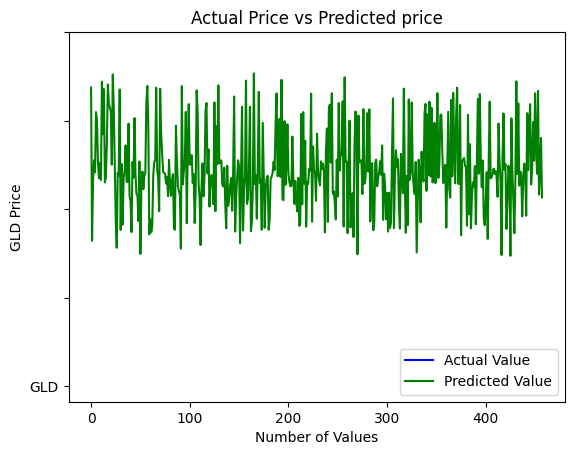

In [56]:
plt.plot(Y_test, color='blue', label = 'Actual Value')
plt.plot(test_data_prediction, color='green' , label= 'Predicted Value')
plt.title('Actual Price vs Predicted price')
plt.xlabel('Number of Values')
plt.ylabel('GLD Price')
plt.yticks([0, 50, 100, 150, 200])
plt.legend()
plt.show()
